<a href="https://colab.research.google.com/github/lauraemmanuella/AprendizadoMaquina/blob/main/4_Avalia%C3%A7%C3%A3o_e_defini%C3%A7%C3%A3o_dos_hiperpar%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina

/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina


In [ ]:
#bibliotecas
import pandas as pd
from IPython.display import Image

[Dataset retirado daqui](https://www.kaggle.com/vvenanccio/irisflowers)

In [ ]:
#lendo o dataset
dfIris = pd.read_csv('./bases/iris.csv')

In [ ]:
#Vamos fazer a mudança de tipo da coluna alvo usando LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(dfIris['class']) #ajusta a função aos dados
dfIris['class'] = le.transform(dfIris['class']) #aplica a função aos dados e atribui à coluna alvo

In [ ]:
dfIris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#dividindo a base
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfIris.drop(columns=['class']), dfIris['class'],test_size=0.33, stratify=dfIris['class'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() #inicializa o objeto da classe com valores default
knn.fit(X_train,y_train) #ajusta o modelo com os dados de treinamento

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test) #executa a predição para os dados de teste

# Métricas de avaliação para tarefa de classificação


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.89      1.00      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



**macro avg** é a média aritmética daquela métrica para todas as classes

**weighted avg** é a média ponderada daquela métrica considerando os suportes (quantidade de amostras por classe),ou seja quanto mais amostras, maior o peso

No caso acima, como os suportes são praticamente iguais, as duas médias são iguais

As métricas **precision, recall, f1-score e accuracy** são calculadas a partir da matriz de confusão que mostra a quantidade de exemplos de cada rótulo (**True label**) e a quantidade de exemplos rotulados como cada classe (**Predicted label**)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix



https://vitorborbarodrigues.medium.com/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c

In [ ]:
print(metrics.confusion_matrix(y_test,pred))

[[17  0  0]
 [ 0 16  1]
 [ 0  2 14]]


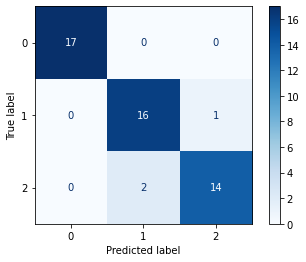

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

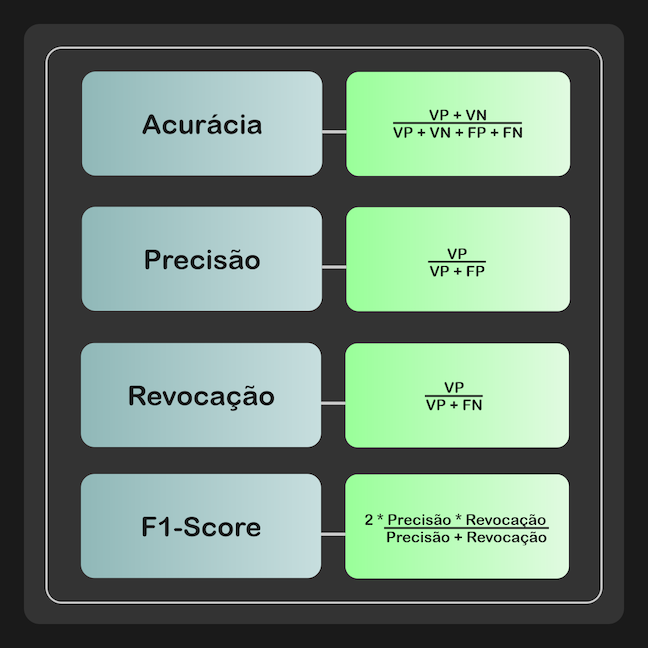

In [ ]:
Image('./img/metricasclassificacao.png')

* **Acurácia**: Percentual de acertos gerais (tanto positivos quanto negativos) do classificador para os dados amostrados
* **Precisão**: Dentre todas as amostras que o classificador rotulou como positivas, quantas realmente eram positivas (*Quando um classificador é altamente preciso, ele tem maior confiabilidade ao rotular como positiva uma amostra. Quando ele diz que é de uma classe, é porque é :D*)
* **Recall**: O recall ou sensibilidade ou revocação é a capacidade do classificador de encontrar todas as amostras positivas, ou seja, dentre todas as amostras que eram positivas, quantas o classificador conseguiu identificar (*Quando um classificador tem alta sensibilidade, o número de falsos negativos é baixo. Quando ele diz que não é, é porque não é :D*)
* **F1-Score**: A medida F é uma média harmônica ponderada entre precisão e recall, que atinge seu melhor valor em 1 e o pior em 0. Quando se usa F1, se considera a precisão e o recall com a mesma importância.
* **Suporte**: Indica o número de amostras para cada classe testada
* **Especificidade**: Especificidade é a capacidade do classificador de encontrar todas as amostras da classe negatica (complemento da sensibilidade para problemas com 2 classes)


# Gridsearch

Encontrar os parâmetros certos para os algoritmos de AM não é trivial. Para isso podemos criar uma "grade" de parâmetros e experimentar todas as combinações possíveis, esse método é chamado GridsearchCV.

O GridSearchCV usa um dicionário que descreve os parâmetros que devem ser testados e um modelo para treinar. A grade de parâmetros é definida como um dicionário, onde as chaves são os parâmetros e os valores são as configurações a serem testadas.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://gusrabbit.com/code/grid-search/

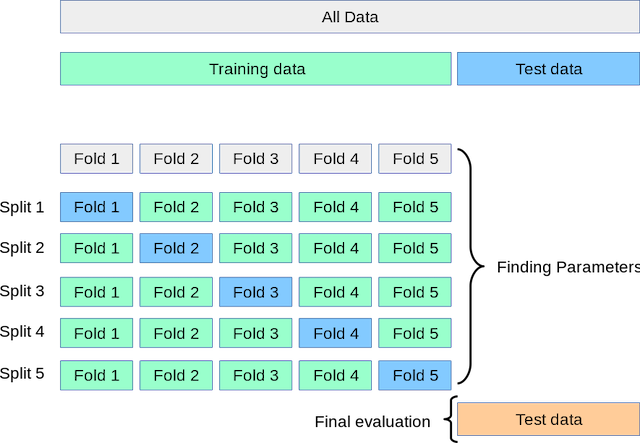

In [ ]:
Image('./img/cv.png')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1,40,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
grid = GridSearchCV(KNeighborsClassifier(),param_grid, verbose = 3)#verbose indica a quantidade de detalhamento das mensagens apresentadas no fit
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.950, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.950, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.950, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.950, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.950, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.950, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighb

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  n_neighbors=1, p=3, weights=distance, score=0.950, total=   0.0s
[CV] n_neighbors=1, p=3, weights=distance ............................
[CV]  n_neighbors=1, p=3, weights=distance, score=0.950, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] . n_neighbors=3, p=1, weights=uniform, score=0.900, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] . n_neighbors=3, p=1, weights=uniform, score=0.950, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] . n_neighbors=3, p=1, weights=uniform, score=0.950, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] . n_neighbors=3, p=1, weights=uniform, score=0.950, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] . n_neighbors=3, p=1, weights=uniform, score=0.950, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    3.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

Por padrão, a pesquisa de parâmetros usa a score function do estimador para avaliar uma configuração de parâmetro. Estas são a sklearn.metrics.**accuracy_score** para classificação e sklearn.metrics.**r2_score** para regressão.


https://scikit-learn.org/stable/modules/grid_search.html#gridsearch-scoring

Mas, podemos configurar para usar as outras métricas ou múltiplas métricas

Você pode inspecionar os melhores parâmetros encontrados pelo GridSearchCV no atributo best_params_ e o melhor estimador no atributo best_estimator_

O atributo best_score_ mostra o score mais alto encontrado

In [ ]:
grid.best_params_

{'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}

In [ ]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')

In [ ]:
grid.best_score_

0.96

Então você pode executar previsões neste objeto da grade com o conjunto de teste

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Os resultados produzidos pela pesquisa em grade (GridSearchCV) podem ser vistos no atributo cv_results_

Normalmente, transformamos ele em um dataframe para melhor visualização e podemos salvá-lo em um arquivo para análises futuras

In [ ]:
dfGridSearch = pd.DataFrame(grid.cv_results_)

In [ ]:
dfGridSearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002809,0.000750,0.004265,0.001697,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.95,0.95,0.95,0.95,0.95,0.95,0.000000,4
1,0.002851,0.000332,0.002281,0.000492,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.95,0.95,0.95,0.95,0.95,0.95,0.000000,4
2,0.002469,0.000555,0.003996,0.001106,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.95,0.90,0.95,0.95,0.95,0.94,0.020000,31
3,0.002937,0.000519,0.002157,0.000720,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.95,0.90,0.95,0.95,0.95,0.94,0.020000,31
4,0.002494,0.000376,0.003314,0.000710,1,3,uniform,"{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}",0.95,0.90,1.00,0.95,0.95,0.95,0.031623,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.001978,0.000188,0.002704,0.000349,39,1,distance,"{'n_neighbors': 39, 'p': 1, 'weights': 'distan...",0.90,0.95,1.00,0.95,0.90,0.94,0.037417,31
116,0.002120,0.000233,0.005000,0.001764,39,2,uniform,"{'n_neighbors': 39, 'p': 2, 'weights': 'uniform'}",0.90,0.95,0.95,0.80,0.85,0.89,0.058310,114
117,0.002098,0.000414,0.002642,0.000494,39,2,distance,"{'n_neighbors': 39, 'p': 2, 'weights': 'distan...",0.95,0.95,1.00,0.90,0.90,0.94,0.037417,31
118,0.002090,0.000345,0.003255,0.000269,39,3,uniform,"{'n_neighbors': 39, 'p': 3, 'weights': 'uniform'}",0.90,0.95,0.95,0.80,0.85,0.89,0.058310,114


In [ ]:
dfGridSearch.loc[dfGridSearch['rank_test_score'] == 1, :]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,0.002187,0.000396,0.004745,0.001693,5,3,uniform,"{'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}",1.00,0.95,0.95,0.95,0.95,0.96,0.020000,1
22,0.002619,0.001266,0.003999,0.001089,7,3,uniform,"{'n_neighbors': 7, 'p': 3, 'weights': 'uniform'}",0.95,0.95,1.00,0.95,0.95,0.96,0.020000,1
25,0.002749,0.000373,0.002287,0.000562,9,1,distance,"{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}",0.90,0.95,1.00,0.95,1.00,0.96,0.037417,1


In [ ]:
#salvando o resultado do gridsearch
dfGridSearch.to_csv('./resultadogridsearch.csv', index=False)